## Infant Mortality Rate (IMR) of Countries in the World - EDA

### by: Etienne Bauscher
#### Completed: 2019-05-07

Let's start with the imports as always

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import fuzzywuzzy
from fuzzywuzzy import process
import chardet
import geopandas as gpd
import os
from wordcloud import WordCloud
import json
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

### READING THE DATA

For this EDA we are going to read into two Pandas DataFrames two datasets that I have chosen. One holds the
demographic infant mortality rates of the countries in the world and the other holds the country ISO codes
of all the countries in the world. 
Let us read these into pandas.

In [2]:
df = pd.read_csv('infant_mortality_rate.csv', delimiter="\t", index_col='Country', header=0)
df_countries = pd.read_csv('countries2.csv', delimiter='\t', engine='python', index_col='name', header=0)

Having a look at the infant mortality rate dataframe below you will see that I have incorporated in the previous lines of code an index column set to the column 'Country'. The header I have made 0 as it is the first row in the dataset that holds all the years.

Studying the dataset we can see that we have some unwanted rows and that we have rows with missing data points throughout all the listed years. I have done some further research and I have discovered that for some of the countries only recent IMR's are available and for some none are available. I have also seen that some of these countries are small islands and could fall under another country possibly incorporating it. I have seen this specifically with the first four listed countries (American Samoa, Anguilla, Aruba and Bermuda) with missing data. For purposes of this EDA we will drop these rows later on.

I have however for one country found records for all the years listed and that is for 'Cook Islands'. I have inserted these manually into the dataset.

One of the things that came to mind when I looked at this dataset was that I would really love to do a choropleth heatmap visualisation that shows the IMR per country for 2017. We will get into this one last :)

Let us clean the data.

In [3]:
df

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,92.4,90.2,88,85.7,83.4,80.9,78.4,75.8,73.2,70.6,68.1,65.6,63.2,60.9,58.7,56.7,54.9,53.2,51.5
Albania,23.2,21.8,20.4,19.1,17.8,16.6,15.4,14.3,13.3,12.3,11.5,10.7,10.1,9.5,9,8.6,8.3,8.1,7.8
Algeria,34.4,33.9,33.3,32.4,31.3,30.1,28.8,27.5,26.4,25.3,24.3,23.5,22.9,22.4,22.1,21.8,21.4,21,20.6
American Samoa,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
Andorra,4.9,4.7,4.6,4.5,4.3,4.2,4.1,4.1,4,3.9,3.9,3.8,3.7,3.7,3.6,3.5,3.4,3.3,3.2
Angola,125.3,122.6,119.3,115.5,111.3,106.6,101.8,96.7,91.5,86.4,81.3,76.4,71.9,67.8,64.1,60.9,58.2,55.8,53.8
Anguilla,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
Antigua and Barbuda,13.8,13,12.3,11.7,11.1,10.6,10.1,9.6,9.2,8.7,8.3,7.8,7.4,7,6.6,6.2,5.9,5.6,5.4
Argentina,18.4,17.7,17,16.3,15.7,15.2,14.7,14.3,14,13.7,13.4,13,12.5,11.9,11.3,10.7,10.2,9.7,9.2


### CLEANING THE DATA CLEANING

For visualising the choropleth map we need country ISO codes. For this reason I have added the second dataset that holds this information, the countries2.csv dataset. To add these columns to the IMR dataset however we need to make sure that the country names and order align with that of the IMR dataset.
Here we will see which names in the countries dataset is not in the IMR dataset.

Let's get a view of the countries listed in the countries2 dataset first.

In [4]:
list(df_countries.index.sort_values())

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Cocos [Keeling] Islands',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican R

We see now the countries listed in the index of the countries2 dataset.
Now onto seeing which country names in the countries dataset are not in the IMR dataset.
The below line of code accomplishes this.
These rows are not a concern in terms of analysing as they are only three percent of the countries in the world and are small islands. Although the lives on those islands are important we will ignore them for now.

In [5]:
df[~df.index.isin(df_countries.index)]

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Channel Islands,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
Curaçao,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
Saint-Martin (French part),..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
Sint Maarten (Dutch part),..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
United States Virgin Islands,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
Data extracted on 02 May 2019 08:53 UTC (GMT) from UIS.Stat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's drop these rows...

In [6]:
df = df.drop(['Channel Islands', 'Curaçao', 'Saint-Martin (French part)', 'Sint Maarten (Dutch part)', 'United States Virgin Islands', 'Data extracted on 02 May 2019 08:53 UTC (GMT) from UIS.Stat'])
df

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,92.4,90.2,88,85.7,83.4,80.9,78.4,75.8,73.2,70.6,68.1,65.6,63.2,60.9,58.7,56.7,54.9,53.2,51.5
Albania,23.2,21.8,20.4,19.1,17.8,16.6,15.4,14.3,13.3,12.3,11.5,10.7,10.1,9.5,9,8.6,8.3,8.1,7.8
Algeria,34.4,33.9,33.3,32.4,31.3,30.1,28.8,27.5,26.4,25.3,24.3,23.5,22.9,22.4,22.1,21.8,21.4,21,20.6
American Samoa,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
Andorra,4.9,4.7,4.6,4.5,4.3,4.2,4.1,4.1,4,3.9,3.9,3.8,3.7,3.7,3.6,3.5,3.4,3.3,3.2
Angola,125.3,122.6,119.3,115.5,111.3,106.6,101.8,96.7,91.5,86.4,81.3,76.4,71.9,67.8,64.1,60.9,58.2,55.8,53.8
Anguilla,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
Antigua and Barbuda,13.8,13,12.3,11.7,11.1,10.6,10.1,9.6,9.2,8.7,8.3,7.8,7.4,7,6.6,6.2,5.9,5.6,5.4
Argentina,18.4,17.7,17,16.3,15.7,15.2,14.7,14.3,14,13.7,13.4,13,12.5,11.9,11.3,10.7,10.2,9.7,9.2


Now, we have to see which rows in the IMR dataset does not have any data in them. As noted ealier, we will drop these too.

In [7]:
df.loc[df.index[df['1999'] == ".."]]

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
American Samoa,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
Anguilla,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
Aruba,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
Bermuda,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
British Virgin Islands,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
Cayman Islands,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
Faeroe Islands,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
French Guiana,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
French Polynesia,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..


As we drop them we overwrite the current DataFrame. 

In [8]:
drop_list = df.index[df['1999'] == ".."]
df = df.drop(drop_list)
list(df.index)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cabo Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',

Now we have to see which country names in the countries dataset is not in the IMR dataset.

In [9]:
df_countries[~df_countries.index.isin(df.index)].index.sort_values()

Index(['American Samoa', 'Anguilla', 'Antarctica', 'Aruba', 'Bermuda',
       'Bouvet Island', 'British Indian Ocean Territory',
       'British Virgin Islands', 'Cayman Islands', 'Christmas Island',
       'Cocos [Keeling] Islands', 'Faeroe Islands',
       'Falkland Islands [Islas Malvinas]', 'French Guiana',
       'French Polynesia', 'French Southern Territories', 'Gaza Strip',
       'Gibraltar', 'Greenland', 'Guadeloupe', 'Guam', 'Guernsey',
       'Heard Island and McDonald Islands', 'Hong Kong', 'Isle of Man',
       'Jersey', 'Kosovo', 'Liechtenstein', 'Macau', 'Martinique', 'Mayotte',
       'Montserrat', 'Netherlands Antilles', 'New Caledonia', 'Niue',
       'Norfolk Island', 'Northern Mariana Islands', 'Pitcairn Islands',
       'Puerto Rico', 'Réunion', 'Saint Helena', 'Saint Pierre and Miquelon',
       'South Georgia and the South Sandwich Islands',
       'Svalbard and Jan Mayen', 'Taiwan', 'Tokelau',
       'Turks and Caicos Islands', 'U.S. Minor Outlying Islands',
  

As we can see the work done on the IMR dataset produces results in the countries dataset for missing countries in the IMR dataset. We will, as with the IMR dataset, drop the out of the countries dataset.
That's a lot of dropping :)

In [10]:
countries2_drop_list = df_countries[~df_countries.index.isin(df.index)].index.sort_values()
df_countries = df_countries.drop(countries2_drop_list)

Let's run the isin() methods again to see if our columns with country names are equal now.

In [11]:
df_countries[~df_countries.index.isin(df.index)].index.sort_values()

Index([], dtype='object', name='name')

In [12]:
df[~df.index.isin(df_countries.index)].index.sort_values()

Index([], dtype='object', name='Country')

As you can see, we have equal columns in our datasets now as no country names are listed for not being in either of the country name columns, Yay!

We will add the country ISO codes column to the IMR dataset later on just before we do the choropleth map. For now, we have balanced the two crucial columns in both of the datasets.

### ANALYSING THE DATA 

Before we can do any sort of visualisations on the IMR dataset we have to ensure that the datatypes of the different columns are in fact in float64 type.
With the code below executed we can see that none of the columns are in fact in datatype float64 and this will cause an error with most visualisations that we would want to do.
For mathematical computation we need to change these into a different type of data.

In [13]:
df.dtypes

1999    object
2000    object
2001    object
2002    object
2003    object
2004    object
2005    object
2006    object
2007    object
2008    object
2009    object
2010    object
2011    object
2012    object
2013    object
2014    object
2015    object
2016    object
2017    object
dtype: object

So we change it...

In [14]:
df = df.astype('float64')
df.dtypes

1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
dtype: object

There we go, now we can move on to doing some visualisations.
Let's have some fun first and create a wordcloud of the country names.

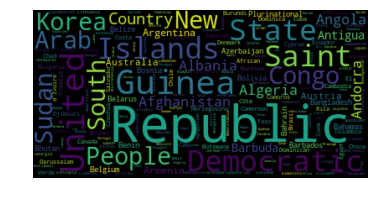

In [15]:
text = df.to_string(columns=['1999'])
wordcloud = WordCloud(margin = 2, max_font_size=60).generate(text) 
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.margins(x = 0, y = 0)
plt.show()

Now for some user interaction. Run the cell below, enter a value and see the result.

In [16]:
user_value = input("Please input a number between 0 and 194: ")
user_to_int = int(user_value)

Please input a number between 0 and 194: 8


You have selected Australia for visualisation.


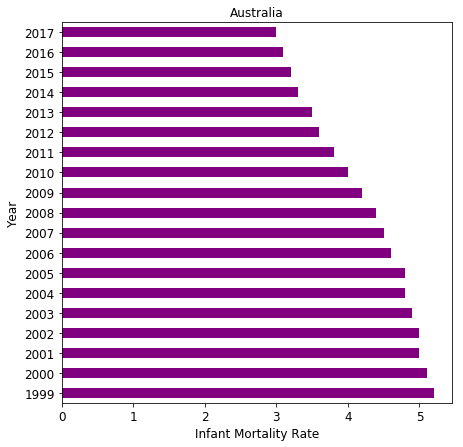

In [17]:
plot_test = df.iloc[user_to_int]
plot_test.plot(kind='barh', color='purple', figsize=(7, 7), fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xlabel('Infant Mortality Rate', fontsize=12)
plt.title(df.index.values[user_to_int])
print('==========================================================\nYou have selected ' + str(df.index.values[user_to_int]) + ' for visualisation.\n==========================================================')

This time, try enter the name of a country for which you want to visualise the IMR.

In [18]:
compare_input_list = list(df.index)
country = input('Please input country name: ')
matches = fuzzywuzzy.process.extract(country, compare_input_list, limit=20, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

Please input country name: Somalia


[('Somalia', 100),
 ('Mali', 73),
 ('Romania', 71),
 ('Malaysia', 67),
 ('Malta', 67),
 ('Slovakia', 67),
 ('Australia', 62),
 ('Malawi', 62),
 ('Albania', 57),
 ('Algeria', 57),
 ('Croatia', 57),
 ('Estonia', 57),
 ('Jamaica', 57),
 ('Oman', 55),
 ('Colombia', 53),
 ('Dominica', 53),
 ('Maldives', 53),
 ('Mongolia', 53),
 ('Slovenia', 53),
 ('Guatemala', 50)]

The program will now check in the next cell whether the country you have entered is in the list. If it is not, then you will be prompted to enter the name again from the list produced in the previous cell. Kindly note that it must match it exactly so you can copy and paste it from the list :)

In [19]:
while country not in compare_input_list:
    country = input("Do you see the country you have entered in the list? \nIf not, please run the previous cell again and try another name\nPlease type it as is on the list without the quotes. ")

You have selected Somalia for visualisation.


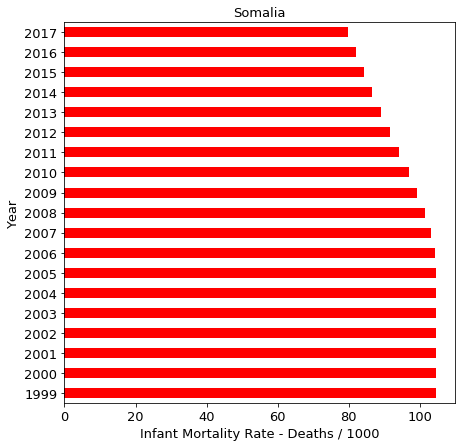

In [20]:
df.loc[country].plot(kind='barh', color='red', figsize=(7, 7), fontsize=13)
plt.xlabel('Infant Mortality Rate - Deaths / 1000', fontsize=13)
plt.ylabel('Year', fontsize=13)
plt.title(country, fontsize=13)
print('==========================================================\nYou have selected ' + str(country) + ' for visualisation.\n==========================================================')

I was wondering how a devastating event like the 2004 tsunami could have affected the IMR's of the affected countries. In research I discovered that 14 countries were affected with the loss of lives being the worst in five countries namely, Indonesia, Sri Lanka, India,  Thailand and Somalia. I visualise below the IMR's for the years 2003 to 2005 for these countries. How will the results look? Let's see...

Text(0.5, 1.0, 'Top Five Countries affected by the 2004 Tsunami')

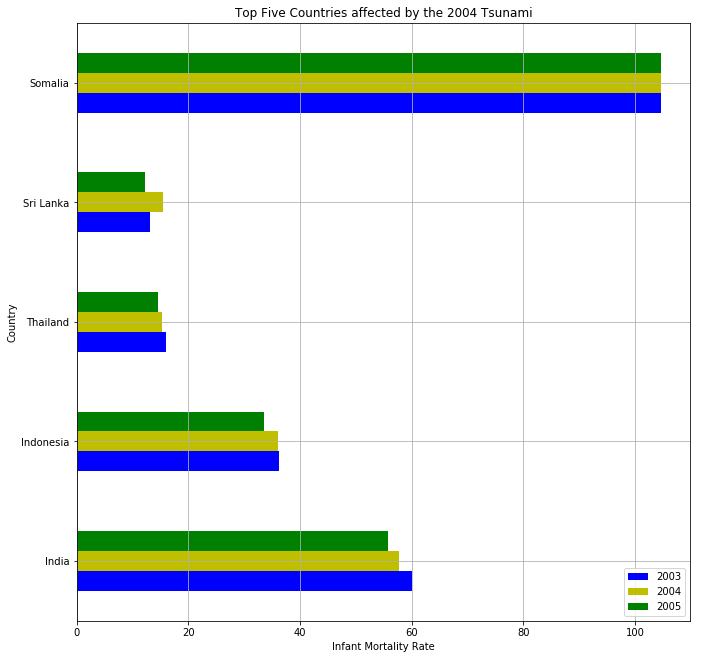

In [21]:
tsunami_list_for_loc = ['India', 'Indonesia', 'Thailand', 'Sri Lanka', 'Somalia']
listin = [df.index.get_loc(x) for x in tsunami_list_for_loc]
years_to_vis = df.iloc[listin, 4:7,]
years_to_vis.plot(kind='barh', figsize=(11,11), grid=True, color='byg')
plt.xlabel('Infant Mortality Rate')
plt.title('Top Five Countries affected by the 2004 Tsunami')

Looking at the above visualisations we can clearly see that Sri-Lanka shows a rise in the IMR for 2004 which is an indication of the devastating effect that the tsunami had on their country. With 30957 lives lost and 5637 missing in a population of only 21.44 million, it was about to show on the statistics.
With 126473 lives lots and 93943 people missing, which is a massive amount of people, it would however not show as easily in the stats for Indonesia with a population of 13 times that of Sri Lanka. The bar does however not show a great decline in IMR from 2003 which could be as a result of the tsunami.
The last country we will look at for now is India and here we are bound even more than with Indonesia not to see the IMR increase in 2004 because India's population is sitting at 1.3 Billion. Their loss of lives, even if all were children and even if we then spread the loss of the 16389 lives over 1000 for the 1.3 billion people, we will not see a drastic rise in the IMR. It would be interesting though 
to weigh the IMR calculations differently to expose and show the effect of these devastating events on IMR. We will leave that for another day :)

On to the next one....
Here we sum all the IMR's of all the countries per year and visualise the distribution as a line.

Text(0, 0.5, 'Gross IMR of all Countries')

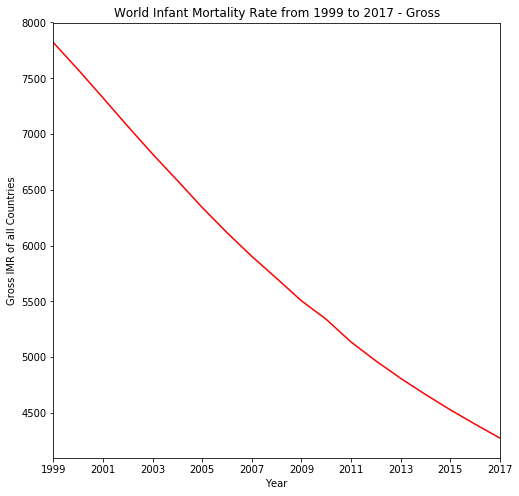

In [22]:
sum_imr = df.sum(axis=0)
sum_imr.plot(kind='line', color='r', figsize=(8,8))
plt.title('World Infant Mortality Rate from 1999 to 2017 - Gross')
plt.xlabel('Year')
plt.ylabel('Gross IMR of all Countries')

By now looking at all the visualisations done so far we can see a natural tendency for the IMR's of the majority of countries to be on the decline and this shows in the above line graph. This is fantastic as it seems globally there is an effort to help infants survive and minimise the loss of the lives of the little ones.
The same visualisation in pie chart is shown below with relative percentages.

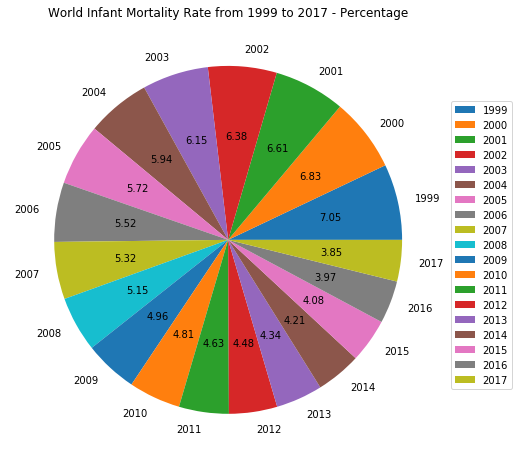

In [23]:
sum_imr2 = df.sum(axis=0)
sum_imr2.plot(kind='pie', subplots=True, figsize=(8,8), autopct='%.2f')
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.83))
plt.title('World Infant Mortality Rate from 1999 to 2017 - Percentage')
plt.ylabel('')
plt.show()

Which country has the greatest IMR if we sum their IMR's for the last 18 years.

Text(0.5, 1.0, "IMR's summed from 1999 to 2017")

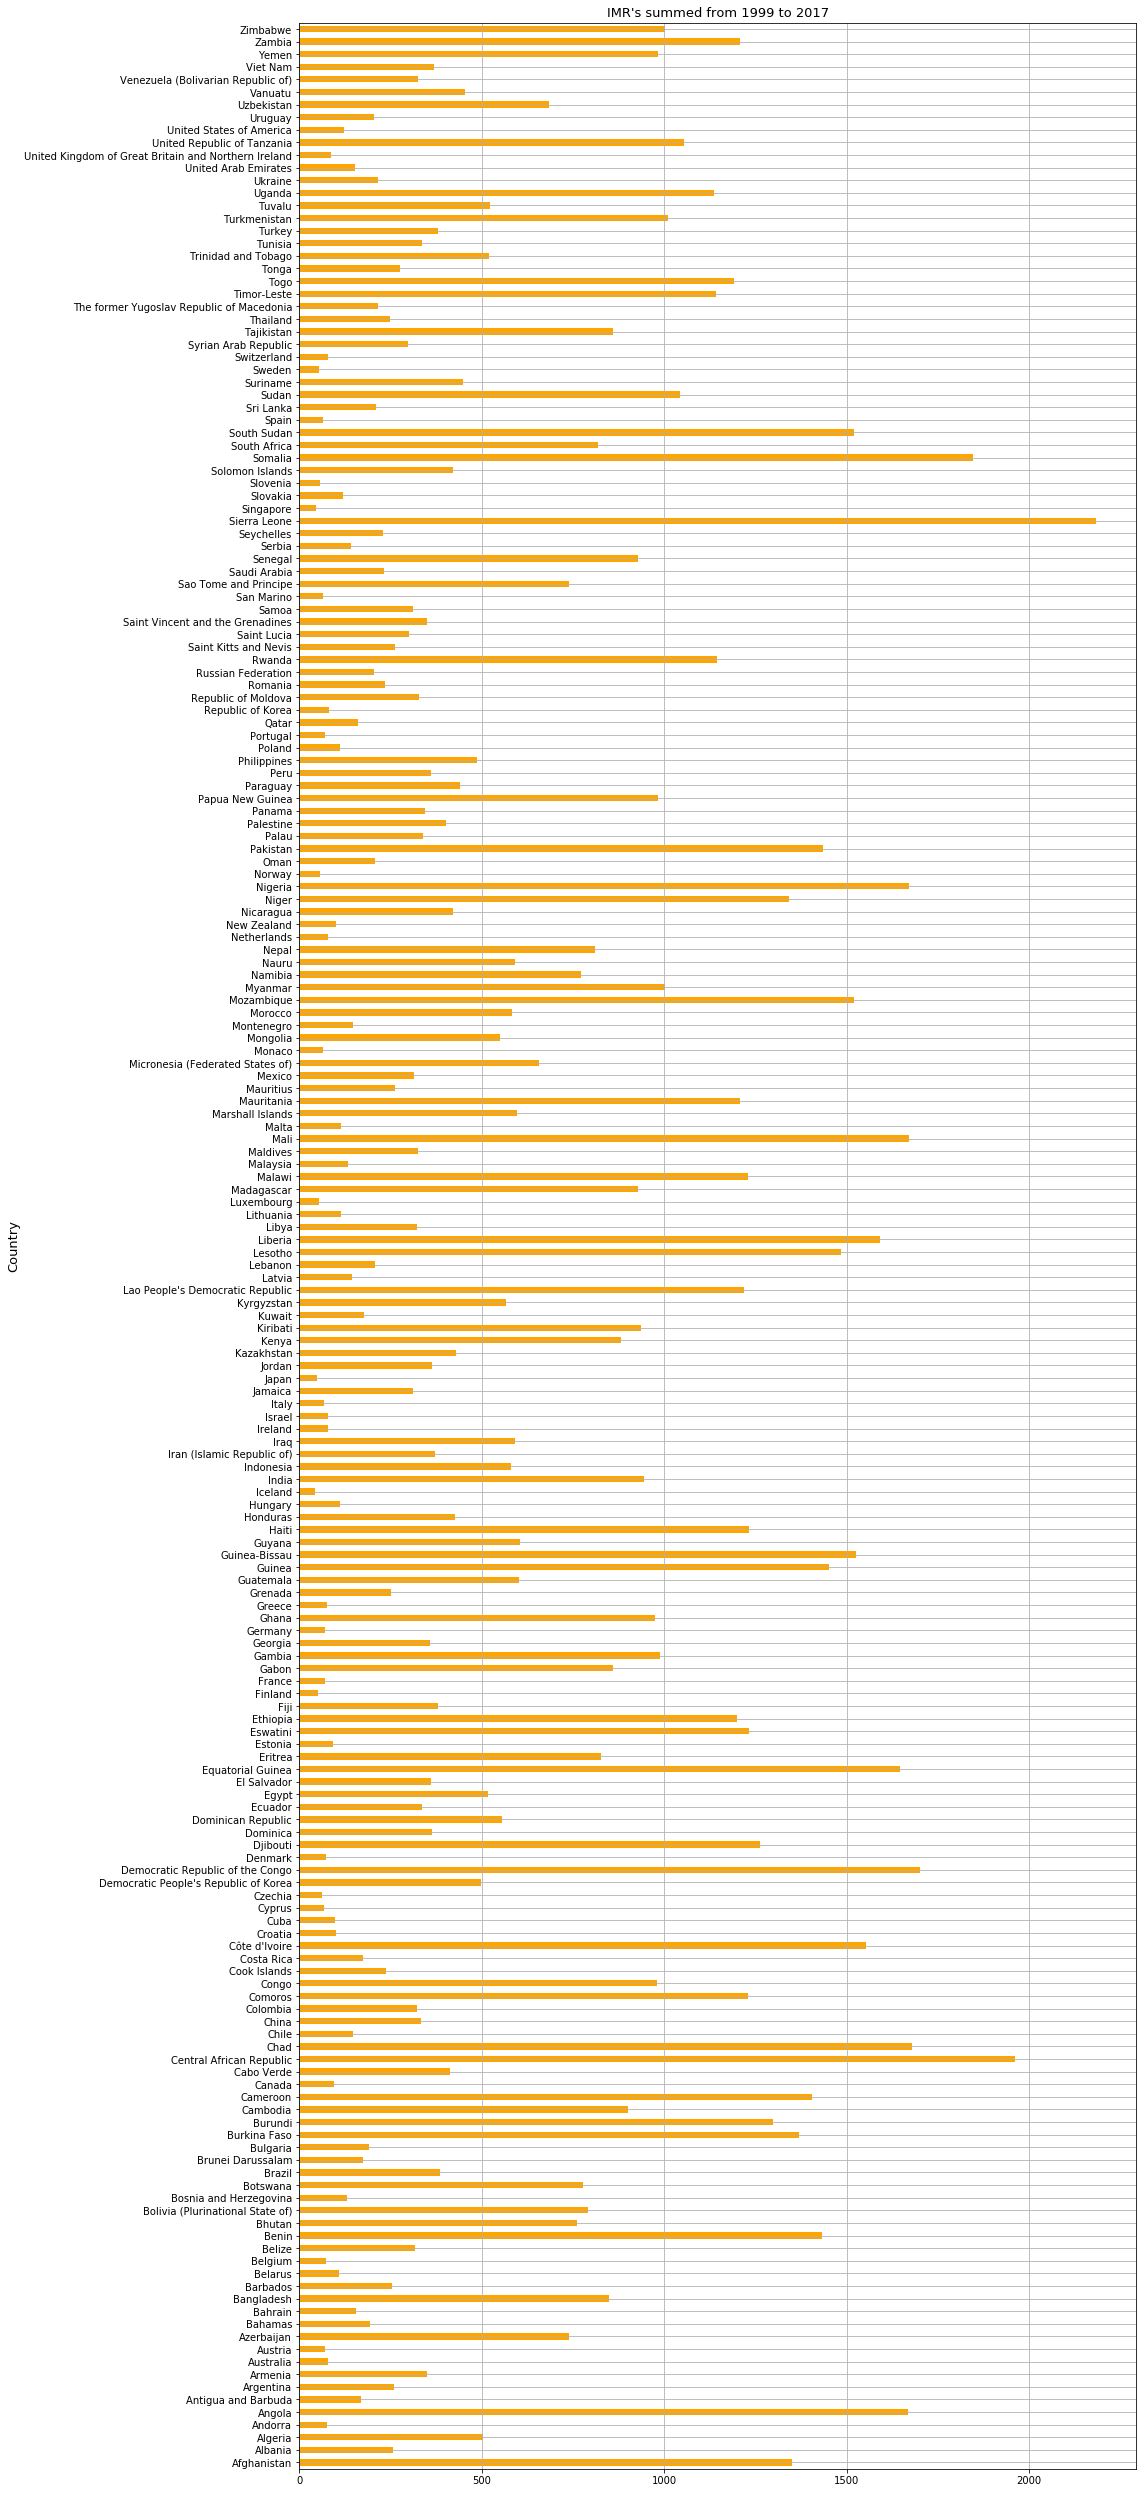

In [24]:
all_imr_2 = df.sum(axis=1)
all_imr_2.plot(kind='barh', figsize=(15,45), grid=True, color='orange')
plt.ylabel('Country', fontsize=13)
plt.xlabel('')
plt.title('IMR\'s summed from 1999 to 2017', fontsize=13)

Sierra Leone stands out among the rest of the world. Why is this? Here is an article for you ellaborating on the problems experienced in Sierra Leone.
https://www.ft.com/content/8205b21e-7b44-11e6-ae24-f193b105145e

To get a different and full view of our listings per country per year we are going to create a heatmap of the whole dataframe. Too busy? I doubt it....It looks great and here we can see out countries with the highest (Sierra Leone) and lowest (Sweden) IMR's easily.

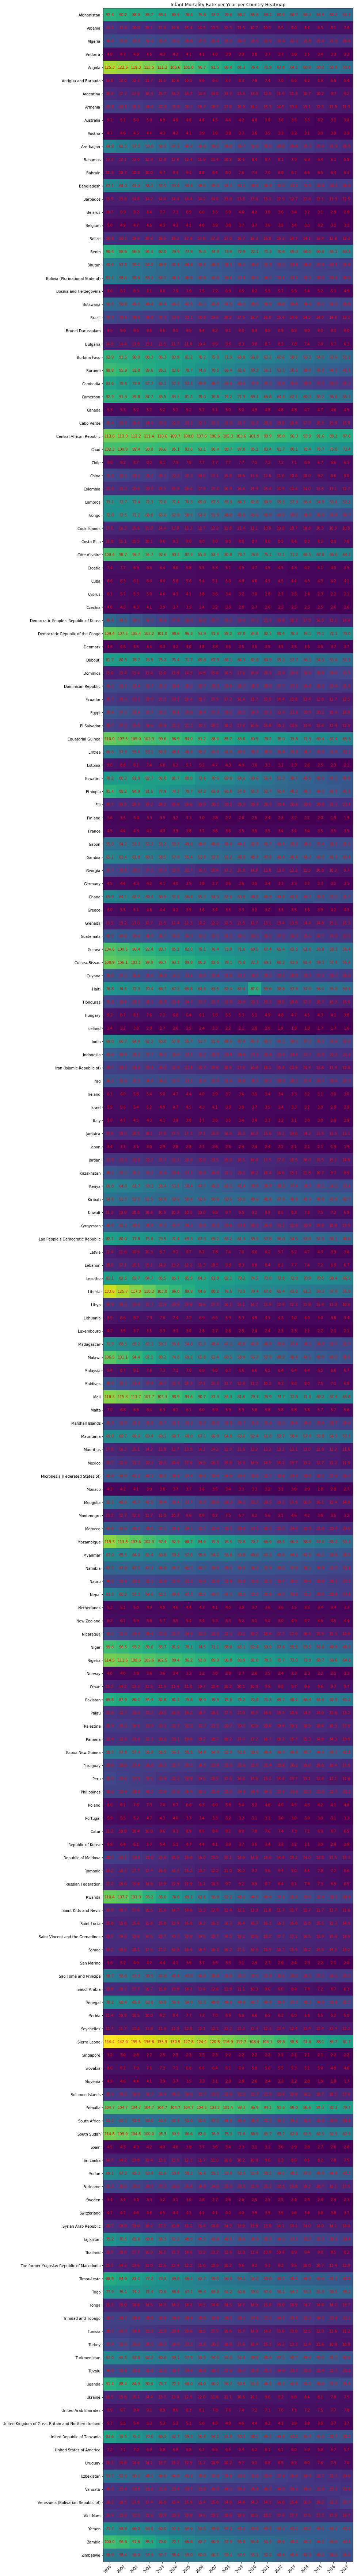

In [25]:
np_array = df.values
# Start plotting specs
fig, ax = plt.subplots(figsize=(25, 98))
im = ax.imshow(np_array)

#set the x and y axis and label them
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, np_array[i, j],
                       ha="center", va="center", color="r")

# set the title and show the plot
ax.set_title("Infant Mortality Rate per Year per Country Heatmap")
fig.tight_layout()
plt.show()

We are going to export the current DataFrames to csv in order for us to generate one dataset that includes all the continents of the countries as well and also the countries' relevant ISO codes. Once merged manually we will read it into a new DataFrame and do some visualisations. We will call this csv file 'continents_ed2.csv'.

Here we go...

In [26]:
df.to_csv('continents.csv')
df_countries.to_csv('country_codes.csv')
df_2 = pd.read_csv('continents_ed2.csv', delimiter="\t")

In [27]:
df_2.head()

,Country,Code,continent,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,Asia,92.4,90.2,88.0,85.7,83.4,80.9,78.4,...,70.6,68.1,65.6,63.2,60.9,58.7,56.7,54.9,53.2,51.5
1,Albania,ALB,Europe,23.2,21.8,20.4,19.1,17.8,16.6,15.4,...,12.3,11.5,10.7,10.1,9.5,9.0,8.6,8.3,8.1,7.8
2,Algeria,DZA,Africa,34.4,33.9,33.3,32.4,31.3,30.1,28.8,...,25.3,24.3,23.5,22.9,22.4,22.1,21.8,21.4,21.0,20.6
3,Andorra,AND,Europe,4.9,4.7,4.6,4.5,4.3,4.2,4.1,...,3.9,3.9,3.8,3.7,3.7,3.6,3.5,3.4,3.3,3.2
4,Angola,AGO,Africa,125.3,122.6,119.3,115.5,111.3,106.6,101.8,...,86.4,81.3,76.4,71.9,67.8,64.1,60.9,58.2,55.8,53.8


Before we visualise the IMR's per continent, let's create a summary table...

In [28]:
group_by_cont = df_2.groupby(by='continent')
sum_imrs = group_by_cont.sum()
imr_per_continent = pd.DataFrame({'1999': sum_imrs['1999'],
                                  '2000': sum_imrs['2000'],
                                  '2001': sum_imrs['2001'],
                                  '2002': sum_imrs['2002'],
                                  '2003': sum_imrs['2003'],
                                  '2004': sum_imrs['2004'],
                                  '2005': sum_imrs['2005'],
                                  '2006': sum_imrs['2006'],
                                  '2007': sum_imrs['2007'],
                                  '2008': sum_imrs['2008'], 
                                  '2009': sum_imrs['2009'],
                                  '2010': sum_imrs['2010'], 
                                  '2011': sum_imrs['2011'], 
                                  '2012': sum_imrs['2012'], 
                                  '2013': sum_imrs['2013'], 
                                  '2014': sum_imrs['2014'], 
                                  '2015': sum_imrs['2015'], 
                                  '2016': sum_imrs['2016'], 
                                  '2017': sum_imrs['2017'],
                                 })
imr_per_continent

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
continent,,,,,,,,,,,,,,,,,,,
Africa,4339.9,4231.9,4110.7,3982.5,3852.4,3720.6,3587.1,3457.9,3338.7,3224.7,3109.6,2996.4,2892.4,2790.8,2699.1,2613.7,2531.5,2453.7,2382.3
Americas,850.2,819.8,792.7,767.5,745.1,723.8,703.6,684.7,666.6,649.8,633.7,644.7,603.8,591.1,579.0,568.4,558.4,550.0,539.3
Asia,1854.8,1775.3,1694.7,1615.5,1541.1,1475.6,1406.1,1345.3,1286.9,1236.0,1179.5,1130.4,1084.6,1042.2,1003.0,966.5,933.0,901.8,871.9
Europe,359.9,343.0,326.6,310.5,295.0,280.7,266.7,253.0,240.5,229.0,219.3,210.7,203.6,197.3,191.1,185.8,181.3,177.0,172.0
Oceania,413.9,405.9,398.8,392.1,386.1,381.5,377.3,373.7,369.8,365.6,361.9,355.9,350.0,344.0,337.0,329.8,322.7,315.5,308.1


And now the visualisation in bar chart. Beauiful!
We can see however that Africa is the continent with the highest IMR in the  world. Yes we are one of the biggest continents but compared to Asia who have 4,4 billion people, we have some work to do!

Text(0.5, 0, 'Continent')

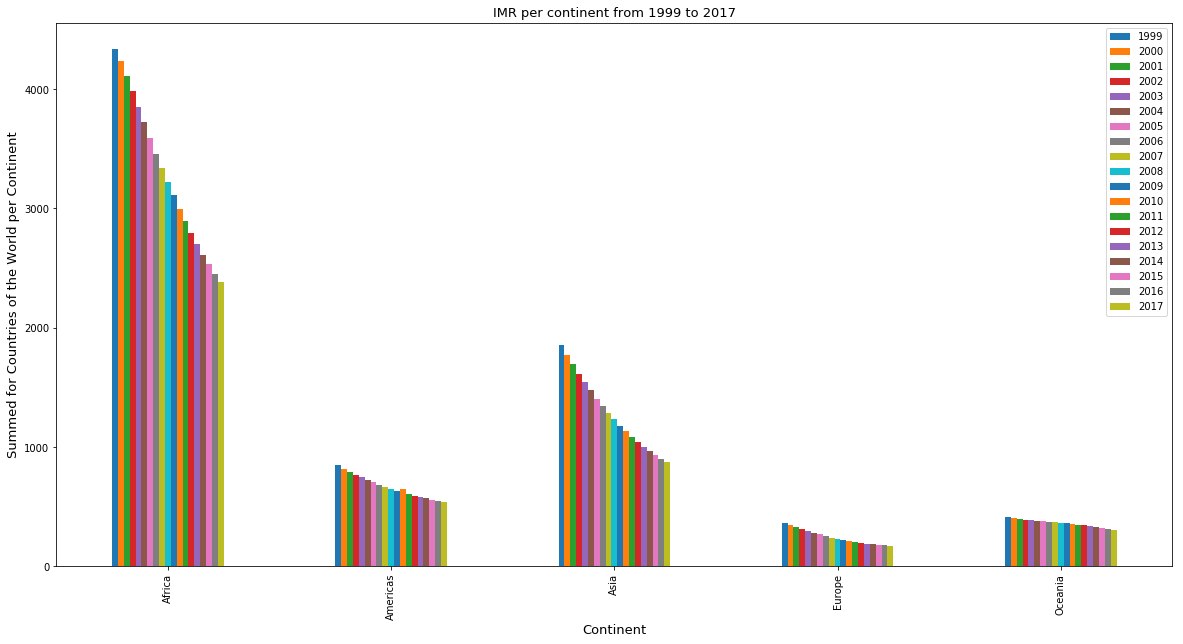

In [29]:
imr_per_continent.plot(kind='bar', figsize=(20,10))
plt.title('IMR per continent from 1999 to 2017', fontsize=13)
plt.ylabel('Summed for Countries of the World per Continent', fontsize=13)
plt.xlabel('Continent', fontsize=13)

Let's do our last visualisation and that is the choropleth map :) I love this one!!
First, we download a shapefile of all the countries of the world locally, set a path and read it with Geopandas.

In [30]:
# Read shapefile using Geopandas
shapefile = os.path.join('ne_110m_admin_0_countries', "ne_110m_admin_0_countries.shp")
# Rename colums
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,United Republic of Tanzania,TZA,POLYGON ((33.90371119710453 -0.950000000000000...
2,Western Sahara,SAH,POLYGON ((-8.665589565454809 27.65642588959236...
3,Canada,CAN,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,United States of America,USA,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


We drop the Antarctic row and set an absolute path of the csv to a variable.

In [31]:
# We drop the Antarctic row
gdf = gdf.drop(gdf.index[159])
datafile2 = os.path.abspath('/Users/Etienne-Macbook/Documents/Developing/Hyperion/working_folder/Task 18/continents_ed2.csv')

We also have to see if there are any null values in our dataset's 'Code' column as we will not be able to visualise those countries. As you can see, we have none!

In [32]:
df_2[df_2['Code'].isnull()]

,Country,Code,continent,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017


Now we are going to set our 2017 dataframe to a variable

In [33]:
df2_2017 = df_2.iloc[1:195, [0,1,21]]
df2_2017

,Country,Code,2017
1,Albania,ALB,7.8
2,Algeria,DZA,20.6
3,Andorra,AND,3.2
4,Angola,AGO,53.8
5,Antigua and Barbuda,ATG,5.4
6,Argentina,ARG,9.2
7,Armenia,ARM,11.3
8,Australia,AUS,3.0
9,Austria,AUT,2.9
10,Azerbaijan,AZE,20.5


We merge it with the Geopandas shapefile

In [34]:
merged2 = gdf.merge(df2_2017, left_on = 'country_code', right_on='Code')

And now we set the json information that is required for the map.

In [35]:
merged_json2 = json.loads(merged2.to_json())
json_data2 = json.dumps(merged_json2)

Let us create the map and display it in this notebook :).

In [36]:
geosource2 = GeoJSONDataSource(geojson = json_data2)
palette2 = brewer['YlGnBu'][8]
palette2 = palette2[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper2 = LinearColorMapper(palette = palette2, low = 0, high = 100)
#Define custom tick labels for color bar.
tick_labels2 = {'0': '0', '10': '10', '20':'20', '30':'30', '40':'40', '50':'50', '60':'60','70':'70', '80': '80'}
#Create color bar. 
color_bar2 = ColorBar(color_mapper=color_mapper2, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels2)
#Create figure object.
p2 = figure(title = 'IMR for Countries of the World 2017', plot_height = 600 , plot_width = 950, toolbar_location = None)
p2.xgrid.grid_line_color = None
p2.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p2.patches('xs','ys', source = geosource2,fill_color = {'field' :'2017', 'transform' : color_mapper2},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p2.add_layout(color_bar2, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p2)

Loading BokehJS ...

#### We are done!